In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
%matplotlib notebook

In [2]:
E = np.zeros(200)
I = np.zeros(200)
R = np.zeros(200)
D = np.zeros(200)
S = np.zeros(200)
II = np.zeros(200);              
a_I = 15  
B_I = 0.313 
a_E = 20    
B_E = 0.313  
i_R = 0.9436  
i_D = 0.0579
e_I= 1/7    
e_R = 0.1   
n = 2/3     
n_d = 1   
#td = np.arange(200);
Time = np.zeros(200)
Time1 = np.zeros(200)
Time2 = np.zeros(200)
T = np.arange(200)
Data_D = np.zeros([200,200])
Data_S = np.zeros([200,200])
Data_I = np.zeros([200,200])
for td_indx in range(200):
    max_time = 0
    max_number = 0
    min_time = 0
    min_number = 11210000
    equal_time = 0
    equal_number = 0
    T = np.arange(200)
    E[0] = 650
    I[0] = 433
    R[0] = 123
    D[0] = 17
    S[0] = 11210000
    II[0] = 433
    n_d = 1
    for idx in range(199):
        if idx>=td_indx:
            n_d = 0.3
        S[idx+1] = S[idx] - a_I*B_I*n*n_d*I[idx]*S[idx]/(S[idx] + E[idx] + R[idx] + I[idx] * n) - a_E*B_E*n_d*I[idx]*S[idx]/(S[idx] + E[idx] + R[idx] + I[idx] * n) + i_R*I[idx] + e_R*E[idx]
        E[idx+1] = E[idx] + a_I*B_I*n*n_d*I[idx]*S[idx]/(S[idx] + E[idx] + R[idx] + I[idx] * n) + a_E*B_E*n_d*I[idx]*S[idx]/(S[idx] + E[idx] + R[idx] + I[idx] * n) - e_I*E[idx] - e_R*E[idx]
        I[idx+1] = I[idx] + e_I*E[idx] - i_R*I[idx]- i_D*I[idx]
        R[idx+1] = R[idx] + i_R*I[idx] + e_R*E[idx]
        D[idx+1]= D[idx] + i_D*I[idx]
        II[idx+1] = II[idx]+ I[idx+1]
    for i in range(200):
        if I[i]>max_number :
            max_number = I[i]
            max_time = i
    for i in range(200):
        if math.floor(S[i])<min_number :
            min_number = math.floor(S[i])
            min_time = i
    for i in range(200):
        if math.floor(D[i])>equal_number :
            equal_number = math.floor(D[i])
            equal_time = i
    Time[td_indx] = max_time
    Time1[td_indx] = min_time
    Time2[td_indx] = equal_time
    Data_D[td_indx] = D
    Data_I[td_indx] = I
    Data_S[td_indx] = S
# print(Time1)
# print(Time)
# print(Time2)


<IPython.core.display.Javascript object>


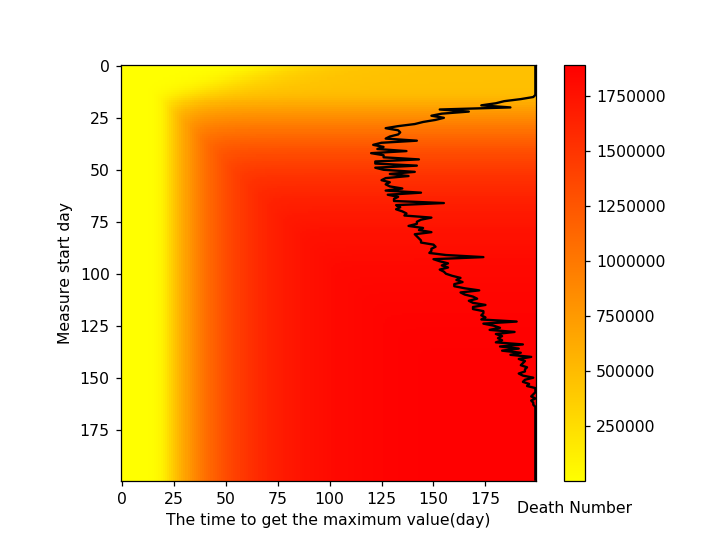

In [9]:
fig1 = plt.figure()
plt.imshow(Data_D,cmap=plt.cm.autumn_r,interpolation='nearest')#, 
plt.colorbar()

plt.plot(Time2,T,'k')
plt.ylabel("Measure start day")
plt.xlabel('The time to get the maximum value(day)')
plt.text(190,215,'Death Number')
plt.show()
fig1.savefig('./Td_D_hotmap.svg', dpi = 400, bbox_inches = 'tight')

<IPython.core.display.Javascript object>


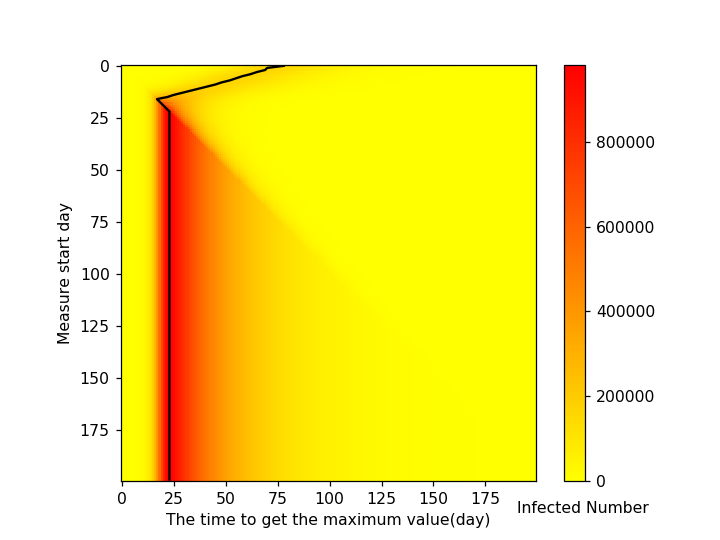

In [10]:
fig2 = plt.figure()
plt.imshow((Data_I),cmap=plt.cm.autumn_r,interpolation='nearest')#, viridis 
plt.colorbar()
plt.plot(Time,T,'k')

plt.ylabel("Measure start day")
plt.xlabel('The time to get the maximum value(day)')
plt.text(190,215,'Infected Number')
plt.show()
fig2.savefig('./Td_I_hotmap.svg', dpi = 400, bbox_inches = 'tight')

<IPython.core.display.Javascript object>


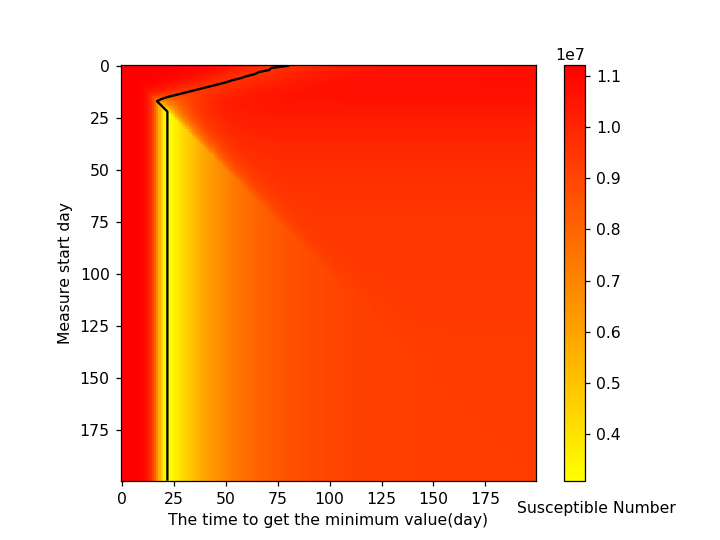

In [11]:
fig3 = plt.figure()
plt.imshow(Data_S ,cmap=plt.cm.autumn_r)#, summer
plt.colorbar()
plt.plot(Time1,T,'k')
#print(Time1)
plt.ylabel("Measure start day")
plt.xlabel('The time to get the minimum value(day)')
plt.text(190,215,'Susceptible Number')
plt.show()
fig3.savefig('./Td_S_hotmap.svg', dpi = 400, bbox_inches = 'tight')